### Programming for Biomedical Informatics
#### Week 2 - Pandas Quick Tour

Here we run quickly through some key functionality for Pandas. It is a hugely rich library which has excellent documentation. Please go here for the official documentation - https://pandas.pydata.org/docs/user_guide/index.html

In [3]:
### Creating DataFrames

import pandas as pd

# Create a DataFrame from a dictionary
data = {'Name': ['John', 'Anna', 'Xiu', 'Wang'],
        'Age': [28, 22, 34, 29],
        'Country': ['USA', 'Germany', 'China', 'China']}
df = pd.DataFrame(data)

df.head()

,Name,Age,Country
0,John,28,USA
1,Anna,22,Germany
2,Xiu,34,China
3,Wang,29,China


In [4]:
### Reading Data from Files

#NB pandas has functions to read data from various file formats like CSV, Excel, SQL, HTML, JSON, etc.
#NB I haven't attched files here!

# Read a CSV file
df = pd.read_csv('data.csv')

# Read an Excel file
df = pd.read_excel('data.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [5]:
### Data Selection

# Selecting a single column
ages = df['Age']
print(ages)
# The type of the column is a pandas Series
print(type(ages))
print("\n")

# Selecting multiple columns
subset = df[['Name', 'Country']]
print(subset)
print("\n")

# Select rows by position
first_five = df.iloc[:5]
print(first_five)
print("\n")

# Select rows by condition
adults = df[df['Age'] >= 18]
print(adults)

0    28
1    22
2    34
3    29
Name: Age, dtype: int64
<class 'pandas.core.series.Series'>


   Name  Country
0  John      USA
1  Anna  Germany
2   Xiu    China
3  Wang    China


   Name  Age  Country
0  John   28      USA
1  Anna   22  Germany
2   Xiu   34    China
3  Wang   29    China


   Name  Age  Country
0  John   28      USA
1  Anna   22  Germany
2   Xiu   34    China
3  Wang   29    China


In [6]:
### Handling Missing Data

# add some missing values to the DataFrame
df.loc[1, 'Age'] = None
df.loc[2, 'Country'] = None
print(df)
print("\n")

# Check for missing values
print(df.isnull())
print("\n")

# Drop rows with any missing values
clean_df = df.dropna()
print(clean_df)
print("\n")

# Fill missing values with a specific value
filled_df = df.fillna(value="Unknown")
print(filled_df)

   Name   Age  Country
0  John  28.0      USA
1  Anna   NaN  Germany
2   Xiu  34.0     None
3  Wang  29.0    China


    Name    Age  Country
0  False  False    False
1  False   True    False
2  False  False     True
3  False  False    False


   Name   Age Country
0  John  28.0     USA
3  Wang  29.0   China


   Name      Age  Country
0  John     28.0      USA
1  Anna  Unknown  Germany
2   Xiu     34.0  Unknown
3  Wang     29.0    China


In [7]:
### Applying Functions

# reset the DataFrame
data = {'Name': ['John', 'Anna', 'Xiu', 'Wang'],
        'Age': [28, 22, 34, 29],
        'Country': ['USA', 'Germany', 'China', 'China']}
df = pd.DataFrame(data)

print(df)
print("\n")

# Apply a lambda function to a column
df['AgePlusTen'] = df['Age'].apply(lambda x: x + 10)

# Apply a function to multiple columns
def process(row):
    return f"{row['Name']} is from {row['Country']}."

df['Description'] = df.apply(process, axis=1)

print(df)
print("\n")

   Name  Age  Country
0  John   28      USA
1  Anna   22  Germany
2   Xiu   34    China
3  Wang   29    China


   Name  Age  Country  AgePlusTen            Description
0  John   28      USA          38      John is from USA.
1  Anna   22  Germany          32  Anna is from Germany.
2   Xiu   34    China          44     Xiu is from China.
3  Wang   29    China          39    Wang is from China.




In [8]:
### Grouping and Aggregating

# Group data by a column and sum another column
country_age_sum = df.groupby('Country')['Age'].sum()
print(country_age_sum)
print("\n")

# More complex aggregations
stats = df.groupby('Country').agg({'Age': ['mean', 'min', 'max']})
print(stats)

Country
China      63
Germany    22
USA        28
Name: Age, dtype: int64


          Age        
         mean min max
Country              
China    31.5  29  34
Germany  22.0  22  22
USA      28.0  28  28


In [9]:
### Pivot Tables
pivot_table = pd.pivot_table(df, values='Age', index='Country', columns='Name', aggfunc='mean')
print(pivot_table)

Name     Anna  John  Wang   Xiu
Country                        
China     NaN   NaN  29.0  34.0
Germany  22.0   NaN   NaN   NaN
USA       NaN  28.0   NaN   NaN


In [10]:
### Merging and Joining

# Creating another DataFrame
other_data = {'Name': ['John', 'Anna', 'Xiu'],
              'Salary': [50000, 62000, 45000]}
other_df = pd.DataFrame(other_data)

print(other_df)
print("\n")

# Merge DataFrames
merged_df = pd.merge(df, other_df, on='Name')
print(merged_df)

   Name  Salary
0  John   50000
1  Anna   62000
2   Xiu   45000


   Name  Age  Country  AgePlusTen            Description  Salary
0  John   28      USA          38      John is from USA.   50000
1  Anna   22  Germany          32  Anna is from Germany.   62000
2   Xiu   34    China          44     Xiu is from China.   45000


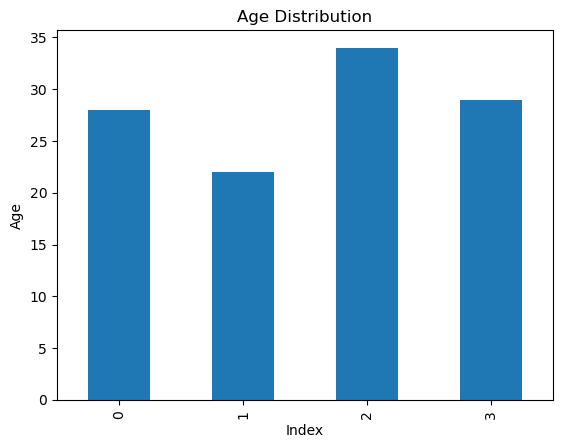

In [11]:
### Plotting Data

import matplotlib.pyplot as plt

# Simple plot of ages
df['Age'].plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Index')
plt.ylabel('Age')
plt.show()

In [12]:
### Examples of DatFrame Merging and Joining

# DataFrame 1
data1 = {
    'EmployeeID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Cindy', 'David']
}
df1 = pd.DataFrame(data1)

# DataFrame 2
data2 = {
    'EmployeeID': [3, 4, 5, 6],
    'Salary': [70000, 85000, 65000, 74000]
}
df2 = pd.DataFrame(data2)

print("DataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)

DataFrame 1:
   EmployeeID   Name
0           1  Alice
1           2    Bob
2           3  Cindy
3           4  David

DataFrame 2:
   EmployeeID  Salary
0           3   70000
1           4   85000
2           5   65000
3           6   74000


In [13]:
### Inner Join

'''An inner join retrieves rows that have matching values in both DataFrames.'''

# Inner join on 'EmployeeID'
inner_merged_df = pd.merge(df1, df2, on='EmployeeID', how='inner')
print(inner_merged_df)

   EmployeeID   Name  Salary
0           3  Cindy   70000
1           4  David   85000


In [14]:
### Outer Join

'''An outer join retrieves all rows from both DataFrames, filling in NA for missing matches.'''

# Outer join on 'EmployeeID'
outer_merged_df = pd.merge(df1, df2, on='EmployeeID', how='outer')
print(outer_merged_df)

   EmployeeID   Name   Salary
0           1  Alice      NaN
1           2    Bob      NaN
2           3  Cindy  70000.0
3           4  David  85000.0
4           5    NaN  65000.0
5           6    NaN  74000.0


In [15]:
### Left Join

'''A left join retrieves all rows from the left DataFrame and the matched rows from the right DataFrame.
Rows in the left DataFrame that do not have a match in the right DataFrame will have NA in the result.'''

# Left join on 'EmployeeID'
left_merged_df = pd.merge(df1, df2, on='EmployeeID', how='left')
print(left_merged_df)

   EmployeeID   Name   Salary
0           1  Alice      NaN
1           2    Bob      NaN
2           3  Cindy  70000.0
3           4  David  85000.0


In [16]:
### Right Join

'''A right join retrieves all rows from the right DataFrame and the matched rows from the left DataFrame.
Rows in the right DataFrame that do not have a match in the left DataFrame will have NA in the result.'''

# Right join on 'EmployeeID'
right_merged_df = pd.merge(df1, df2, on='EmployeeID', how='right')
print(right_merged_df)

   EmployeeID   Name  Salary
0           3  Cindy   70000
1           4  David   85000
2           5    NaN   65000
3           6    NaN   74000
